# Task

You work for an investment firm.

Your manager hears that you have been experimenting building models for the California housing market.

They ask you whether you could create a model for a specific area that they are interested in investing in.

You agree and they send you through some data.

The deliverables for this are:
- a presentation about your insights into the market you have gained from the data
-  A proof of concept model

Afterwards, it will be decided whether or not it would be worthwhile spending money to acquire more data and develop it further.

Unfortunately, your manager didnt give you much guidance beyond the brief. They didn't know what the file contained, or communicate any other information to you. In fac, after sending the file they signed off and went on leave with the parting words "i'm sure you'll do great".

You have to present your initial proof of concept tomorrow to the wider team.

There is quite a lot to sort out before then!

##### You can use the skeleton laid out below as a guide or you can choose to take your own direction with it

##### Skills required
- Basic Python
- Data manipulation and Vizualisation in Pandas and MatplotLib, Seaborn etc
- Data Prep, cleaning, scaling etc
- Linear Regression Modelling in SKLearn
- Clear communication skills to effectively convey the limitations of the model built





In [19]:
import pandas as pd

In [3]:
# first thing to do is to read in the data
df = pd.read_csv('Real estate.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
df['X1 transaction date'].round()

0      2013.0
1      2013.0
2      2014.0
3      2014.0
4      2013.0
        ...  
409    2013.0
410    2013.0
411    2013.0
412    2013.0
413    2014.0
Name: X1 transaction date, Length: 414, dtype: float64

In [7]:
df['X1 transaction date'] = df['X1 transaction date'].astype(int)

What are the first issues we can see?
 - There is no location, or explanation of of the units of price
 - We don't know whether this price column referrs to renting or buying or what currency
 - The date column, this is a frequent issue
 - thankfully no missing values but we should investiage further to see if we have negatives etc
 - Only 414 rows of data, this is only a POC and all we can do it go with what we have

In [24]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012,5.0,390.56840,5,24.97937,121.54245,43.1


In [25]:
df['Y house price of unit area'].mean()

37.980193236714975

In [28]:
import numpy as np

In [29]:
mean_price = df['Y house price of unit area'].mean()
df['above_mean_price']= np.where(df['Y house price of unit area']>mean_price, 'yes', 'no')
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,above_mean_price
0,2012,32.0,84.87882,10,24.98298,121.54024,37.9,no
1,2012,19.5,306.59470,9,24.98034,121.53951,42.2,yes
2,2013,13.3,561.98450,5,24.98746,121.54391,47.3,yes
3,2013,13.3,561.98450,5,24.98746,121.54391,54.8,yes
4,2012,5.0,390.56840,5,24.97937,121.54245,43.1,yes
...,...,...,...,...,...,...,...,...
409,2013,13.7,4082.01500,0,24.94155,121.50381,15.4,no
410,2012,5.6,90.45606,9,24.97433,121.54310,50.0,yes
411,2013,18.8,390.96960,7,24.97923,121.53986,40.6,yes
412,2013,8.1,104.81010,5,24.96674,121.54067,52.5,yes


In [31]:
import seaborn as sns

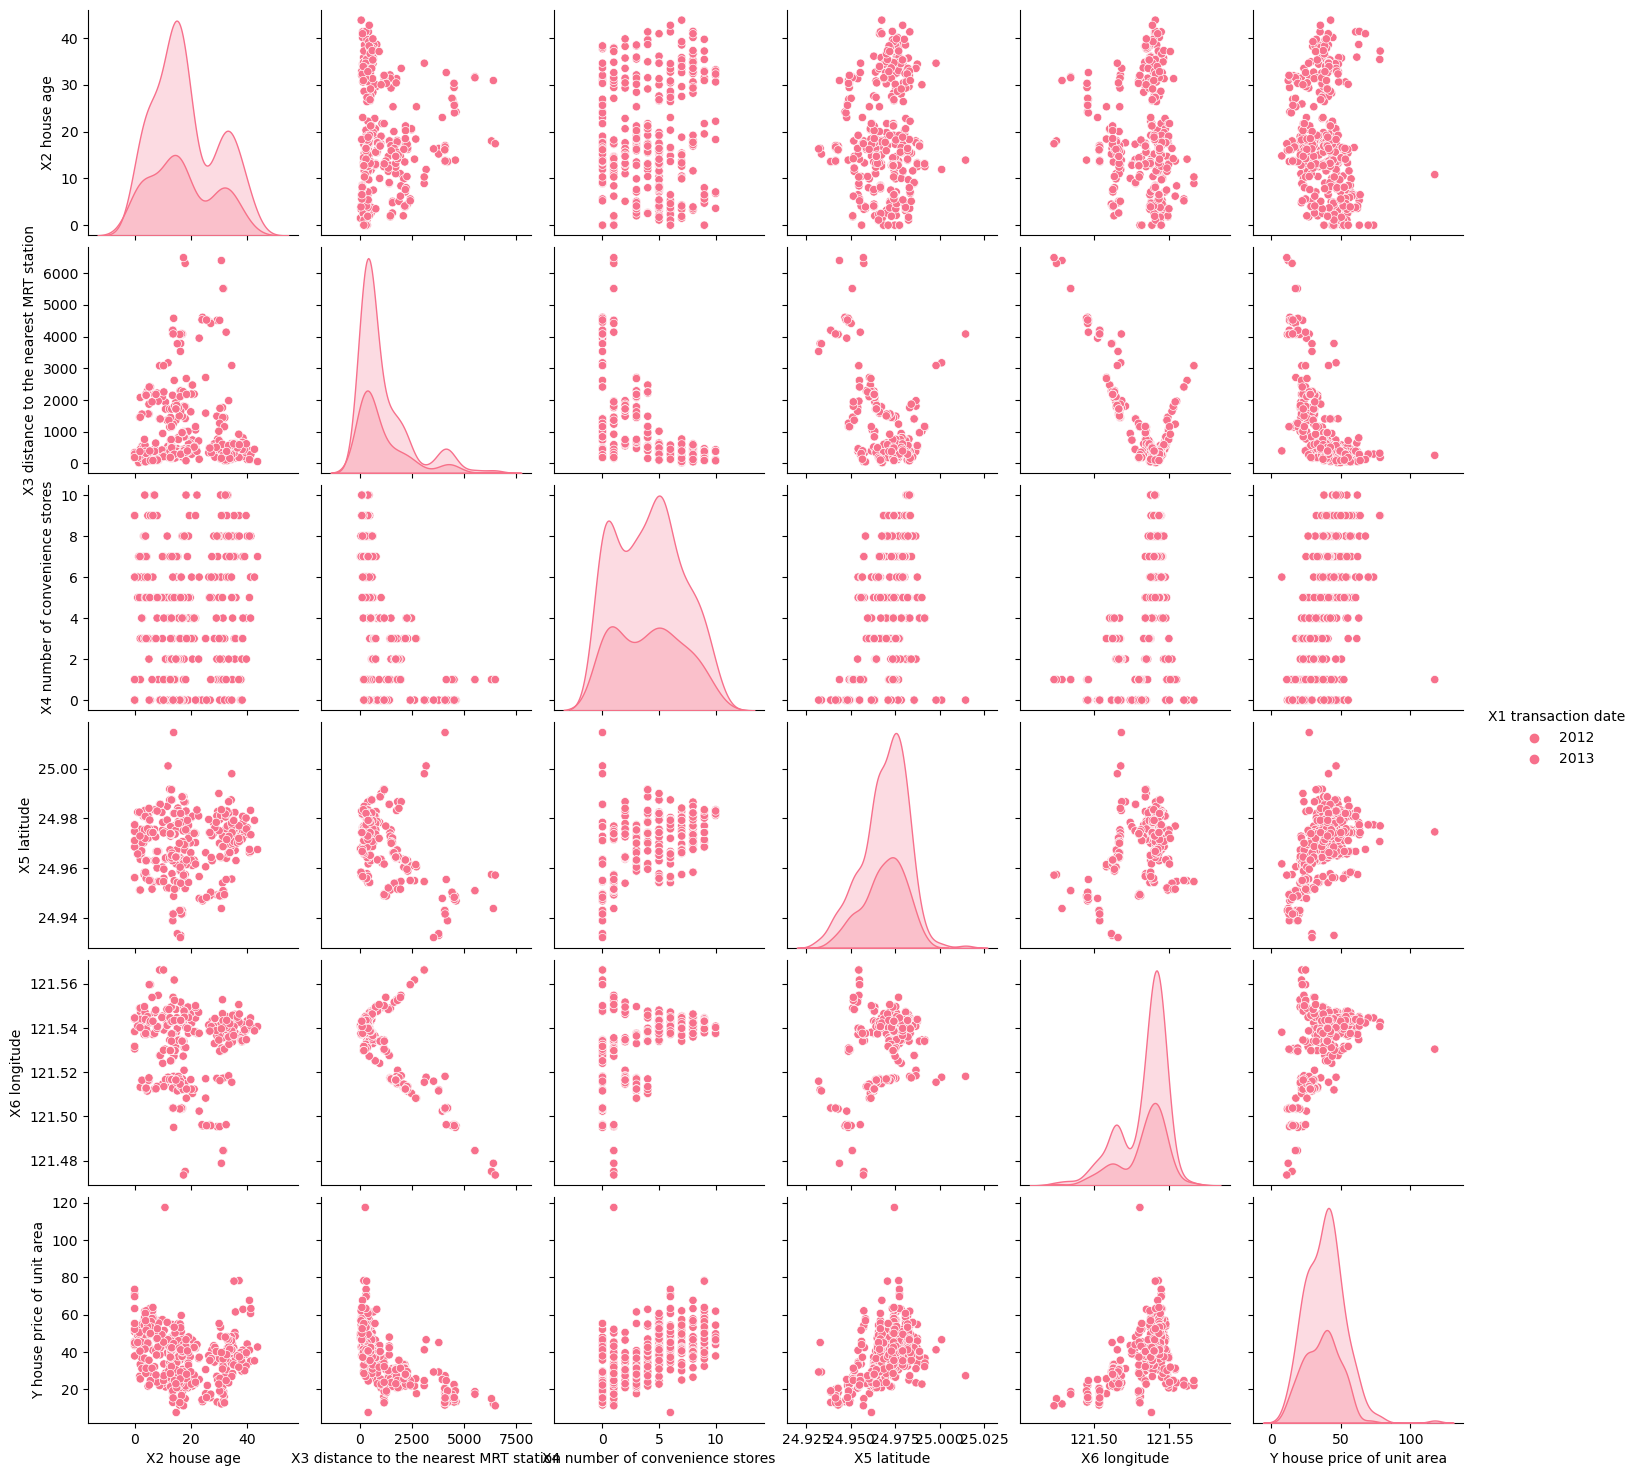

In [35]:
sns.pairplot(data=df, hue = "X1 transaction date", palette="husl")

df.plot(kind='scatter', x='X3 distance to the nearest MRT station', y='Y house price of unit area'

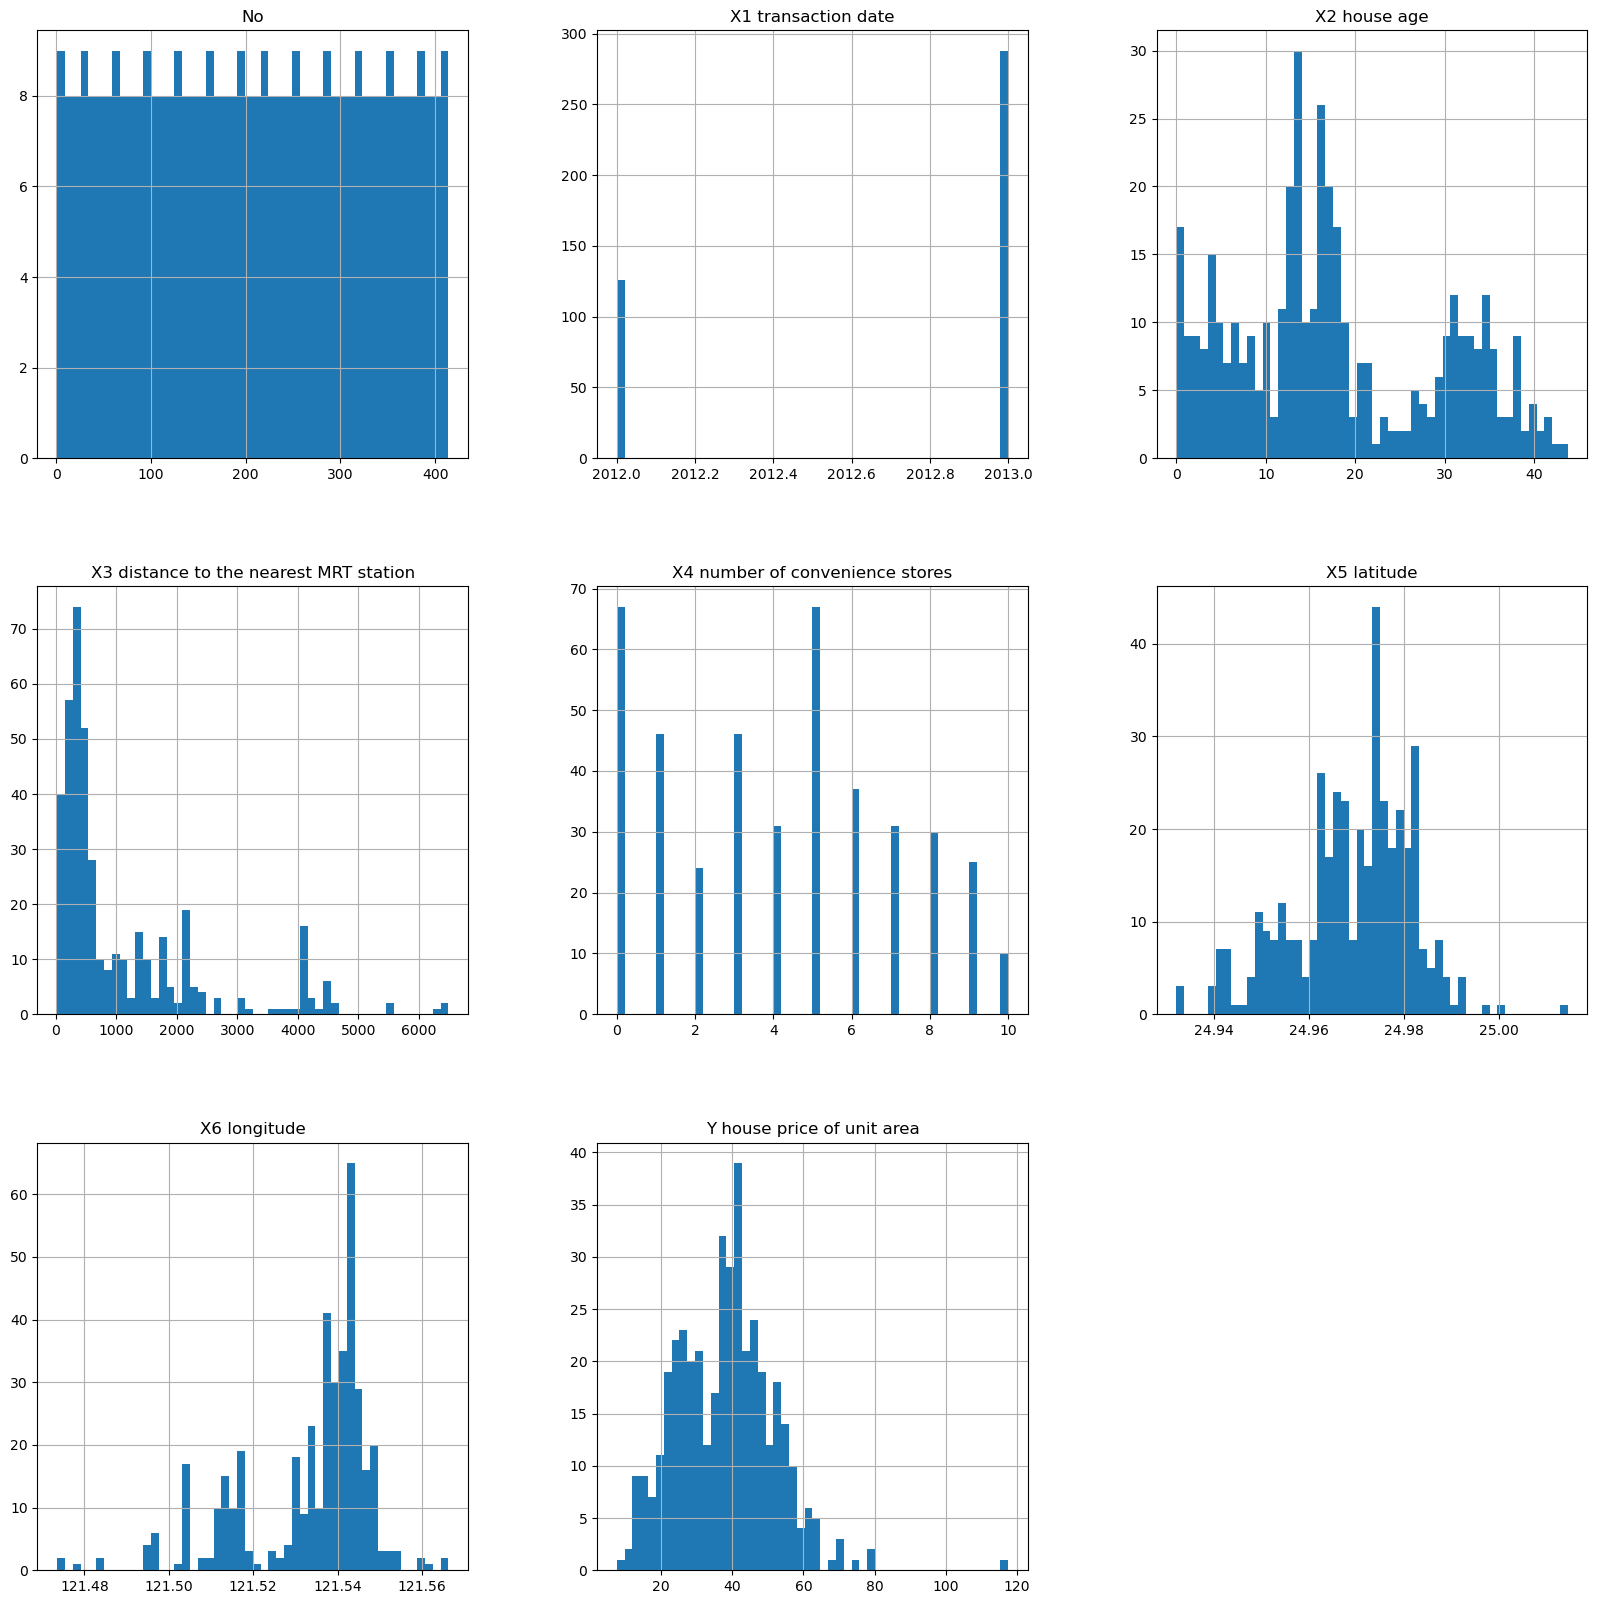

In [9]:
#df.hist(bins = 50, figsize=(20,20));

Well, some things we can fix:
- Firstly, go and find out where exactly these properties are
  - Wouldn't look to good giving a presentation on a housing market and not knowing where it was
- As for the price, would it be possible to continue building?
 - Yes we can
 - It doesnt really matter what the units are or what currency
 - We can deal with this later
 
- The date column
 - As we are building a Mutli Linear Regression and not a time series we could just extract the year
   - This is not a straightforward date to deal with, the year will suffice for now

In [10]:
#pip install folium

     ---------------------------------------- 97.0/97.0 kB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 56.3/56.3 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


#### Get rid of uneeded columns

In [11]:
#import folium

In [18]:
#df.drop(columns = 'No', inplace = True)

KeyError: "['No'] not found in axis"

#### Obvious errors or placeholders fo NANs


In [22]:
#map_center = [df['X5 latitude'].mean(), df['X6 longitude'].mean()]
#my_map = folium.Map(location=map_center, zoom_start=10, tiles='OpenStreetMap')
#for index, row in df.iterrows():
#    folium.CircleMarker([row['X5 latitude'], row['X6 longitude']], radius=5, color='blue', fill = True, fill_color = 'blue',
#                       fill_opacity=0.3, popup= f"Location{index}").add_to(my_map)

No negative values or anything obvious<br>
There is quite a range of house prices, from 7.6 per unit area to 117, we can look at this on a scatter plot of the locations in the EDA

In [23]:
my_map

##### The location

#### After taking a random sample and searching
#### The location is Taipei

### I will rename the columns for convienience

#### The date column

#### Initial EDA
- Explore the data frame
- Check ranges and distributions of the data
- Plot the target over the distirbutions
- Investigate the correlation between all variables
- If you are going to use some of these charts in a presentation, make sure they look good,
  - choose nice colour pallettes
  - ensure axis are labelled
  - make sure the charts are easy to understand
  
  
You dont need to build a Power Point presesntation for this task, just create charts that you would be happy to includs in one

 As expected more expensive in the city

# Examine correlations

No Obvious outliers present

#### Ideas for data viz

Lets create a new column for above and below mean price, we can then view the distribution of this over our other variables

we can see the distribution of above average prices in relation to the proximity to mrt stations

# Outliers
 - shall we reomove?
 - I will remove some outliers into a copy of the data frame
 - Looks like removing some from MRT, Price and long may help
 - What are the effects of this?

# Create your Train Test Split of the Data

# Perform any Re-Scaling you feel is necessary
- why scale after splitting?

# Build your models and assses the best combination of features
 - What defines the best combination?
 - Which metric will  you use?
 - Investment firms are all about margins, could this help?<br>https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html

# Write a function that takes in a row of data and outputs whether or not your model thinks it is undervalued and by how much

# Can you write a similiar function that will take in multiple rows of data, and return only those that your model thinks is undervalued along with the amount. 
 - The Final output of this would be good in a DataFrame

# Display the models performance in some way fit for your presentation

# Summarise the limitations of your model and make suggestions for improving and moving forward 